In [1]:
import polars as pl
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

2024-10-04 18:06:53.465862: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 18:06:53.466322: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 18:06:53.468531: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 18:06:53.474609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 18:06:53.484842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
!pwd

/run/media/mohamed/MyData/Development/seismic_detection/notebooks


In [3]:
data_dir = "../../seismic_data/data/"
files: list[str] = []
for root, dirs, file in os.walk(data_dir):
    for f in file:
        files.append(os.path.join(root, f))
files = sorted(files)

In [4]:
files

['../../seismic_data/data/test/mars/0001.csv',
 '../../seismic_data/data/test/mars/0002.csv',
 '../../seismic_data/data/test/mars/0007.csv',
 '../../seismic_data/data/test/mars/0011.csv',
 '../../seismic_data/data/test/mars/0017.csv',
 '../../seismic_data/data/test/mars/0032.csv',
 '../../seismic_data/data/test/mars/0033.csv',
 '../../seismic_data/data/test/mars/0034.csv',
 '../../seismic_data/data/test/mars/0041.csv',
 '../../seismic_data/data/test/moon/12_b_00006.csv',
 '../../seismic_data/data/test/moon/12_b_00007.csv',
 '../../seismic_data/data/test/moon/12_b_00014.csv',
 '../../seismic_data/data/test/moon/12_b_00016.csv',
 '../../seismic_data/data/test/moon/12_b_00018.csv',
 '../../seismic_data/data/test/moon/12_b_00020.csv',
 '../../seismic_data/data/test/moon/12_b_00021.csv',
 '../../seismic_data/data/test/moon/12_b_00026.csv',
 '../../seismic_data/data/test/moon/12_b_00027.csv',
 '../../seismic_data/data/test/moon/12_b_00028.csv',
 '../../seismic_data/data/test/moon/12_b_00029.

In [5]:
# split the data into training and testing
files_train: list[str] = [file for file in files if "train" in file]
files_test: list[str] = [file for file in files if "test" in file]

In [6]:
files_train

['../../seismic_data/data/train/mars/0005.csv',
 '../../seismic_data/data/train/mars/0006.csv',
 '../../seismic_data/data/train/moon/12_a_00002.csv',
 '../../seismic_data/data/train/moon/12_a_00003.csv',
 '../../seismic_data/data/train/moon/12_a_00004.csv',
 '../../seismic_data/data/train/moon/12_a_00006.csv',
 '../../seismic_data/data/train/moon/12_a_00007.csv',
 '../../seismic_data/data/train/moon/12_a_00008.csv',
 '../../seismic_data/data/train/moon/12_a_00009.csv',
 '../../seismic_data/data/train/moon/12_a_00010.csv',
 '../../seismic_data/data/train/moon/12_a_00011.csv',
 '../../seismic_data/data/train/moon/12_a_00013.csv',
 '../../seismic_data/data/train/moon/12_a_00014.csv',
 '../../seismic_data/data/train/moon/12_a_00015.csv',
 '../../seismic_data/data/train/moon/12_a_00017.csv',
 '../../seismic_data/data/train/moon/12_a_00019.csv',
 '../../seismic_data/data/train/moon/12_a_00021.csv',
 '../../seismic_data/data/train/moon/12_a_00022.csv',
 '../../seismic_data/data/train/moon/12_

In [7]:
files_test

['../../seismic_data/data/test/mars/0001.csv',
 '../../seismic_data/data/test/mars/0002.csv',
 '../../seismic_data/data/test/mars/0007.csv',
 '../../seismic_data/data/test/mars/0011.csv',
 '../../seismic_data/data/test/mars/0017.csv',
 '../../seismic_data/data/test/mars/0032.csv',
 '../../seismic_data/data/test/mars/0033.csv',
 '../../seismic_data/data/test/mars/0034.csv',
 '../../seismic_data/data/test/mars/0041.csv',
 '../../seismic_data/data/test/moon/12_b_00006.csv',
 '../../seismic_data/data/test/moon/12_b_00007.csv',
 '../../seismic_data/data/test/moon/12_b_00014.csv',
 '../../seismic_data/data/test/moon/12_b_00016.csv',
 '../../seismic_data/data/test/moon/12_b_00018.csv',
 '../../seismic_data/data/test/moon/12_b_00020.csv',
 '../../seismic_data/data/test/moon/12_b_00021.csv',
 '../../seismic_data/data/test/moon/12_b_00026.csv',
 '../../seismic_data/data/test/moon/12_b_00027.csv',
 '../../seismic_data/data/test/moon/12_b_00028.csv',
 '../../seismic_data/data/test/moon/12_b_00029.

In [8]:
# load h5
model = tf.keras.models.load_model("../quake-detector/quake_detector.h5")
model.summary()

I0000 00:00:1728054415.652790   39433 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-04 18:06:55.657895: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 498, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 498, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 249, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 249, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 247, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 247, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 123, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 123, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       251,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,043 (1011.89 KB)

 Trainable params: 258,849 (1011.13 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
df_test = pl.read_csv(files_test[0])
df_test = df_test["velocity"].to_numpy()
pred = []
print(df_test.shape)
for window in range(1000, len(df_test), 1000):
    test = df_test[window-1000:window]
    # print(test.shape)
    test = test.reshape(-1, 500, 2)
    prediction = model.predict(test)
    pred.append(prediction)

In [14]:
pred = np.array(pred)
pred = pred.reshape(-1, 1)
pred.shape

(71, 1)

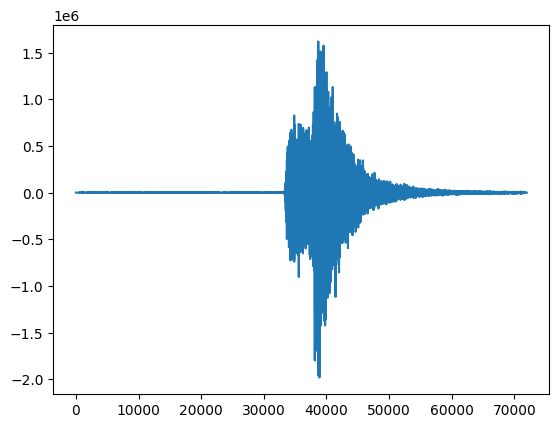

In [16]:
plt.plot(df_test)

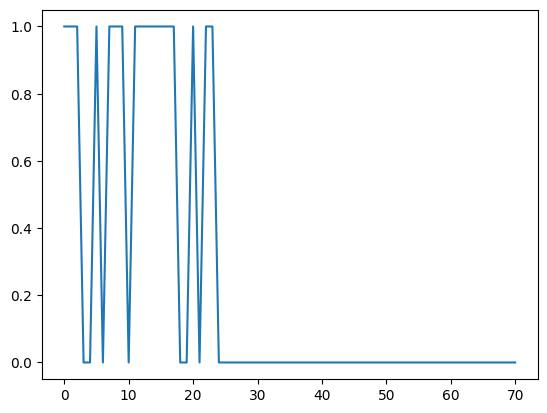

In [15]:
plt.plot(pred)

In [ ]:
predictions = []
for i in range(len(files_test)):
    df_test = pl.read_csv(files_test[i])
    df_test = df_test["velocity"].to_numpy()
    print(df_test.shape)
    prediction = model.predict(df_test)
    predictions.append(prediction)

In [ ]:
plt.plot(predictions)
plt.show()